Import libraries -- may need to revisit to remove unused ones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


<div class="span4 alert alert-success">
** QUESTION HERE***


HERE I read the file. But when I work on the DF manupulation sometimes I make a mistake, and as we all know creating duplicate dfs don't work because if you change one all will change.

What do you recommend here? How do I back-up? Do I go all the way to the beginning? Do I write a csv file?

</div>

In [2]:
df=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df1=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df2=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df3=pd.read_csv("autos.csv",  encoding='cp1252'  )
#df4=pd.read_csv("autos.csv",  encoding='cp1252'  )
df.head()
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [3]:
df.name=df.name.str.replace("_", " ")
df.seller.unique()
df.seller[df.seller=="privat"] = "private"
df.seller[df.seller=="gewerblich"] = "dealer"


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
namecol=df.name.str.split(" ")
#namecol.pop(0)
liste
[]
#namecol.apply(brnd for brnd in liste for row in namecol for elmnt in row if brnd in elmnt )
namecol=namecol[:100]


In [ ]:
def namecol_list(nm,lst):
    results=[]
    
    for row in nm: 
        for elmnt in row:     
            i=0
            while i < len(lst):
                
                if lst[i] in elmnt:
                    results.append(lst[i])
                
                else:
                    i+=1
                    
                    if i == len(lst): 
                     
                        results.append("NaN")
                
                
                
                
                
               # else: results.append("NaN")
    return (results)

    

In [ ]:
namecol_list(namecol,liste)

#namecol1=[brnd if brnd in elmnt else "NaN" for row in namecol for elmnt in row for brnd in liste  ]

In [26]:
namecol1

['NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',



<div class="span4 alert alert-success">
Here filtering starts on top and bottom level.
Pretty easy to tell there will be no cars for 0 or "1 €", or under "100€" --- these are fake advertisements just to draw attention.
Also, there are ultra luxurious brands, and another filter was written to see and filter out cars that are not ultra luxurious but ultra pricey.

I am plannig to working on using str.split and isin method, which will look nicer. I don't know if it is really necessary.

</div>

In [ ]:
LEVEL 1
#df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])
df=df.drop(df[df.price==0].index)
df=df.drop(df[df.price==1].index)
df=df.drop(df[df.price<=100].index)
df=df.drop(df[df.price==2147483647].index)
search=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) &  (df.name.str.contains("Ferrari")==False)
          & (df.name.str.contains("Maserati")==False) & (df.name.str.contains("Porsche")==False)
          & (df.price>=2000000)]
search
df=df.drop(search.index)

In [ ]:
### LEVEL 2

#df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])
#df=df.drop(df[df.price==0].index)
#df=df.drop(df[df.price==1].index)
#df=df.drop(df[df.price<=100].index)
#df=df.drop(df[df.price==2147483647].index)
search=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) &  (df.name.str.contains("Ferrari")==False)
          & (df.name.str.contains("Maserati")==False) & (df.name.str.contains("Porsche")==False)
          & (df.name.str.contains("Lamborghini")==False) & (df.name.str.contains("Aston Martin")==False)
          & (df.name.str.contains("Museum")==False) & (df.name.str.contains("Jaguar")==False)
          & (df.name.str.contains("Rolls Royce")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DeTomaso")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("McLaren")==False)
          & (df.price>=200000) & (df.yearOfRegistration > 1980)]
search 
#### DİKKAT!!!df=df.drop(search.index)

In [ ]:
### LEVEL 3

#df=df.drop(columns=["offerType","postalCode","nrOfPictures","dateCreated","lastSeen"])
#df=df.drop(df[df.price==0].index)
#df=df.drop(df[df.price==1].index)
#df=df.drop(df[df.price<=100].index)
#df=df.drop(df[df.price==2147483647].index)
search=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) &  (df.name.str.contains("Ferrari")==False)
          & (df.name.str.contains("Maserati")==False) & (df.name.str.contains("Porsche")==False)
          & (df.name.str.contains("Lamborghini")==False) & (df.name.str.contains("Aston Martin")==False)
          & (df.name.str.contains("Museum")==False) & (df.name.str.contains("Jaguar")==False)
          & (df.name.str.contains("Rolls Royce")==False)  & (df.name.str.contains("AMG")==False)
          &(df.name.str.contains("DeTomaso")==False) &(df.name.str.contains("BMW Z8")==False)
          &(df.name.str.contains("McLaren")==False)
          & (df.price>=100000) & (df.yearOfRegistration > 1980)]
search 
#### DİKKAT!!!df=df.drop(search.index)

In [ ]:
search=df[df.price>0.8*1e6]
###df=df.drop(search.index)
search

**** CAUTION HERE*****


<div class="span4 alert alert-success">
Here the top filtering ends, but are these the results I want?
I cleaned all fake data, but there are outliers still....Do I want them?
</div>

In [ ]:
#df.head().notRepairedDamage.isnull().sum()

#sns.scatterplot(data=np.log(df.price)*10,  alpha=0.3)
sns.scatterplot(data=df.price,  alpha=0.3)


In [ ]:
df.shape
df.columns
print(df.info())
print(df['vehicleType'].value_counts(dropna=False))

In [ ]:
#df.loc[df.price==df.price.max()]

In [ ]:
#search=df[df.price>=1500000]
#search.sort_values(by="price")


In [ ]:
#df.loc[df.price>=0.2*1e8]
#df=df.drop(df[df.price>=0.2*1e8].index)
#sns.scatterplot(data=df.price, alpha=0.3)

#df.loc[df.price>=0.9*1e7]
#df=df.drop(df[df.price>=0.9*1e7].index)
#sns.scatterplot(data=df.price, alpha=0.3)

df.loc[df.price>=1.9*1e6]
#df=df.drop(df[df.price>=0.9*1e7].index)
#sns.scatterplot(data=df.price, alpha=0.3)



(array([12236.,   193.,   506.,   385.,  1351.,   266.,  1791.,   742.,
         2243.,   286.,  2350.,   822.,  2847.,   331.,  2670.,  1008.,
         2534.,   249.,  2129.,  1123.,  5753.,   201.,  2902.,  1417.,
         3906.,   246.,  3350.,  1575.,  3011.,   233.,  3316.,  1700.,
         3828.,   221.,  3039.,  1708.,  2911.,   169.,  2890.,  4897.]),
 array([  0.   ,  24.975,  49.95 ,  74.925,  99.9  , 124.875, 149.85 ,
        174.825, 199.8  , 224.775, 249.75 , 274.725, 299.7  , 324.675,
        349.65 , 374.625, 399.6  , 424.575, 449.55 , 474.525, 499.5  ,
        524.475, 549.45 , 574.425, 599.4  , 624.375, 649.35 , 674.325,
        699.3  , 724.275, 749.25 , 774.225, 799.2  , 824.175, 849.15 ,
        874.125, 899.1  , 924.075, 949.05 , 974.025, 999.   ]),
 <a list of 40 Patch objects>)

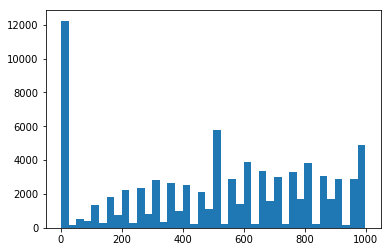

In [27]:
plt.clf()
plt.hist(df.price[df.price<1000], bins=40)

In [ ]:
df['price'].plot(kind='hist', rot=90, logx=False, logy=True)

In [ ]:
df=df.drop(df[df.price>500000].index)

In [ ]:
df[(df.brand.isin(["porsche","ferrari","maserati","smart"])==False) & (df.price<1000)]

In [ ]:
#df.brand.isin(["volkswagen","ferrari","maserati"])==False

In [ ]:
df[df.brand=="sonstige_autos"]


In [ ]:
df.name[2173].split(" ") in liste

In [ ]:
namesplit1=(df.name[371523].split(" "))
namesplit1[1]

In [ ]:
#namesplit1 in liste

for i in range (len(namesplit1)):
    if namesplit1[i] in liste:
        print(namesplit[i])
    else: print("yok")

In [ ]:
df1=df
df1

In [ ]:
df1["yedek"]=""


In [ ]:
df1

In [ ]:
df.name[(df.brand =='sonstige_autos') & (df.model.isna() == True)]

In [ ]:
df.name[2]

def namesplit(x,list,change):
    """checks if dataframe element has list element in it"""
    namesplitted = x.split(" ")
    for i in range len(namesplitted):
        if namesplitted[i] in liste:
            x.brand = 

In [ ]:
(df.name[2].split(" "))[0] in (liste)

In [ ]:
brands=list(df.brand.unique().str.capitalize())

In [6]:
brands=df.brand.unique()
brands=pd.DataFrame(brands)

In [7]:
liste=list(brands[0].str.capitalize())
liste

['Volkswagen',
 'Audi',
 'Jeep',
 'Skoda',
 'Bmw',
 'Peugeot',
 'Ford',
 'Mazda',
 'Nissan',
 'Renault',
 'Mercedes_benz',
 'Opel',
 'Seat',
 'Citroen',
 'Honda',
 'Fiat',
 'Mini',
 'Smart',
 'Hyundai',
 'Sonstige_autos',
 'Alfa_romeo',
 'Subaru',
 'Volvo',
 'Mitsubishi',
 'Kia',
 'Suzuki',
 'Lancia',
 'Porsche',
 'Toyota',
 'Chevrolet',
 'Dacia',
 'Daihatsu',
 'Trabant',
 'Saab',
 'Chrysler',
 'Jaguar',
 'Daewoo',
 'Rover',
 'Land_rover',
 'Lada']

In [ ]:
type(df.name[2].split(" "))

In [ ]:
liste.remove("Sonstige_autos")

In [ ]:
liste.sort()

In [ ]:
liste

In [ ]:
df.name[(df.brand =='sonstige_autos') & (df.model.isna() == True)]
df=df.drop(df[(df.brand =='sonstige_autos') & (df.model.isna() == True)].index)
df=df.drop(df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=900000)].index)


sil1=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=500000) & (df.yearOfRegistration>2000)]
df=df.drop(df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=500000) & (df.yearOfRegistration>2000)].index)


sil2=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=200000) & (df.yearOfRegistration>1000)]
sil2

sil3=df[(df.price<1000) & (df.yearOfRegistration>2010)]
sil3

df=df.drop(df[(df.price<1000) & (df.yearOfRegistration>2010)].index)

df = df.reset_index(drop=True)
df

sil4=df[(df.price<1000) & (df.yearOfRegistration>2005)]
sil4

#One too shui fooooo
#df=df.drop(df[df.name=="One too shui fooooo"].index)

df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=100000) & (df.yearOfRegistration>1000)]
#df.iloc[181036] ---- sil

In [ ]:
sns.scatterplot(data=df.price,  alpha=0.3)

In [ ]:
#search=df[df.price>=1500000]
#search.sort_values(by="price")
search=df[(df.brand.isin(["porsche","ferrari","maserati"])==False) & (df.price>=190000)]
search

In [ ]:
df2=df


In [ ]:
df2.head()

In [ ]:
df2.brand=df2.brand.str.capitalize()

In [ ]:
df2.head(20)


In [ ]:
df

In [ ]:
df2=df2.drop(df2[df2.model.isna()].index)

In [ ]:
#df2=df2.drop(
df2[df2.model=="grand"]

In [ ]:
models=df2.model.unique()
models=pd.DataFrame(models)
models.sort_values(by=0)

models=list(models[0])
print(models)
print(liste)

In [ ]:
brand_models={'Alfa_romeo', 
              'Audi':["A4","A5","A6"],  
              'Bmw', 
              'Chevrolet', 
              'Chrysler':["Grand Voyager"], 
              'Citroen', 
              'Dacia', 
              'Daewoo', 
              'Daihatsu', 
              'Fiat',
              'Ford', 
              'Honda', 
              'Hyundai', 
              'Jaguar', 
              'Jeep': ["Grand Cherokee"], 
              'Kia', 
              'Lada', 
              'Lancia', 
              'Land_rover', 
              'Mazda', 
              'Mercedes_benz', 
              'Mini', 
              'Mitsubishi', 
              'Nissan',
              'Opel', 
              'Peugeot', 
              'Porsche', 
              'Renault', 
              'Rover', 
              'Saab', 
              'Seat', 
              'Skoda', 
              'Smart', 
              'Subaru', 
              'Suzuki':["Grand Vitara"], 
              'Toyota':["Corolla", "Yaris"], 
              'Trabant':[], 
              'Volkswagen':['Golf'],
              'Volvo':[]
                 }

In [ ]:
df2.model=df2.model.str.capitalize()
df2

In [ ]:
grand_opt={'Chrysler':"Grand Voyager", 'Suzuki':"Grand Vitara",'Jeep': "Grand Cherokee"}
df4=df2

In [ ]:
def lookupCode(code):
    return grand_opt.get(code)

#df1.name.map(lookupCode)
#df1.name = df1.code.map(lookupCode)

In [ ]:
df.model=df.model.str.capitalize()
df.brand=df.brand.str.capitalize()
#df.model[df1.model=="Grand"] = 
df.model[df.model=="Grand"] = df.brand[df.model=="Grand"].map(lookupCode)

In [ ]:
df